## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [6]:
!pip install ucimlrepo

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();

from ucimlrepo import fetch_ucirepo

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing.
Let's take a brief look to the dataset.

In [8]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [9]:
df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [10]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
19608,30,management,married,tertiary,no,3330,no,no,cellular,7,aug,109,6,-1,0,NaN
4049,27,admin.,single,secondary,no,276,yes,no,NaN,19,may,311,2,-1,0,NaN
42775,49,technician,divorced,NaN,no,387,no,no,cellular,28,jan,325,1,-1,0,NaN
41723,54,NaN,married,NaN,no,895,no,no,cellular,7,oct,335,1,-1,0,NaN
15856,45,blue-collar,married,primary,no,0,yes,no,cellular,21,jul,81,4,-1,0,NaN


In [11]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN


# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [12]:
1.2 What is the highest number of NaN values in a single column?
print("The highest number of NaN values in a single column is: ", df.isna().sum().max())

Object `column` not found.
The highest number of NaN values in a single column is:  36959


In [13]:
1.3 What is the name of the column with the smallest number (>0) of NaN values?
array = df.isna().sum()[df.isna().sum() > 0]
print("The name of the column with the smallest number of NaN values is: ", array[array == array.min()].index[0])

Object `values` not found.
The name of the column with the smallest number of NaN values is:  job


In [14]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
df.fillna('unknown',inplace = True)
# for numerical columns (if any) fill with column mean value


<ipython-input-14-d6a0ccc2c68d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('unknown',inplace = True)


-----
## Q2
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [15]:
print("The fraction of 1 vlaues in the dataset is: ", round((y == 'yes').sum()/len(y),3))

The fraction of 1 vlaues in the dataset is:  y    0.117
dtype: float64


In [16]:
df['y'] = list(y['y'])


In [17]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

-----
## Q3
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [18]:
#3.3 What is the least successful marital category?
proportion = df[df.y =='yes'].groupby("marital").count()/df.groupby("marital").count()
print("The least successful marital category is: ",proportion.y.idxmin())

The least successful marital category is:  married


In [19]:
#3.4 List top 3 most successful job categories in alphabetical order
proportion_job = df[df.y =='yes'].groupby("job").count()/df.groupby("job").count()
print("The top 3 most successful job category is: ",proportion_job.y.nlargest(3).sort_index().index.tolist())

The top 3 most successful job category is:  ['retired', 'student', 'unemployed']


In [20]:
#3.6 Find the job with the smallest median balance. The answer is this job's median balance.
median = df.groupby("job").median()['balance']
print("The job with the smallest median balance is: ",median.idxmin())

The job with the smallest median balance is:  services


<ipython-input-20-91e2a6e12d99>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = df.groupby("job").median()['balance']


-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [21]:
# TODO map y (target) values to 0 / 1
mapper = {"yes": 1,
        "no": 0}
df['y'] = df['y'].map(mapper)


In [22]:
# TODO map binary columns' values to 0 / 1
df['default'] = df['default'].map(mapper)
df['loan'] = df['loan'].map(mapper)
df['housing'] = df['housing'].map(mapper)

In [23]:
#4.1 Who accepts more deposits (on average): people with housing loans (housing) or people with personal loans (loan)? The answer is the acceptance rate of the chosen (most successful) category.
proportion_housing = round(len(df.query('y==1 and housing==1'))/len(df.query('y==1')),3)
proportion_loan = round(len(df.query('y==1 and loan ==1'))/len(df.query('y==1')),3)
if proportion_housing > proportion_loan:
  print("People with housing accepts more deposit on average")
else:
  print("People with personal loans accepts more deposit on average")

People with housing accepts more deposit on average


In [24]:
#4.2 What is the min, max, average and std values of age among people who have housing loans (housing)? The answer shold be given in descending order
min = df[df.housing == 1]['age'].min()
max = df[df.housing == 1]['age'].max()
mean = round(df[df.housing == 1]['age'].mean(),3)
std = round(df[df.housing == 1]['age'].std(),3)
array11 = [min,max,mean,std]
sorted(array11,reverse = True)

[78, 39.175, 20, 8.927]

-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

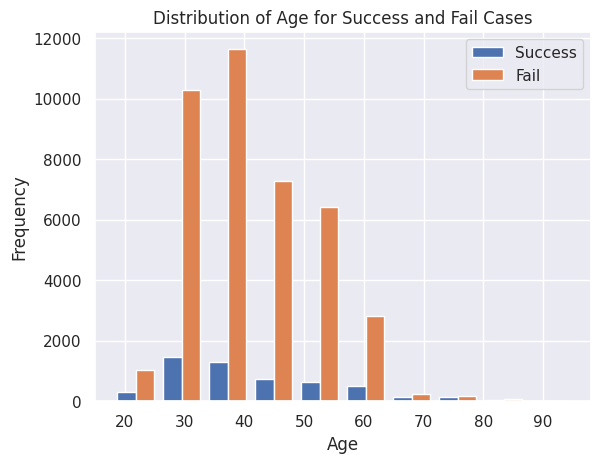

A


In [25]:
successful_age = df.query('y == 1')['age']
failure_age = df.query('y == 0')['age']


num_bins = 10

plt.hist([successful_age, failure_age], num_bins, label=['Success', 'Fail'])
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Success and Fail Cases')
plt.show()
print('A')

## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

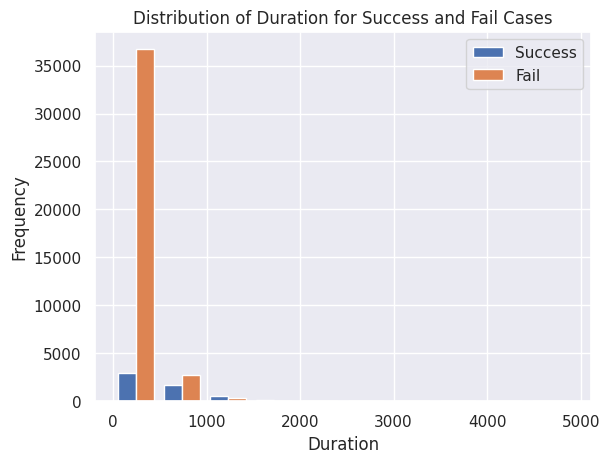

C


In [26]:
successful_duration = df.query('y == 1')['duration']
failure_duration = df.query('y == 0')['duration']


num_bins = 10

plt.hist([successful_duration, failure_duration], num_bins, label=['Success', 'Fail'])
plt.legend(loc='upper right')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration for Success and Fail Cases')
plt.show()
print('C')

-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [27]:
# TODO define numerical columns
num_cols = df.select_dtypes(include = 'number').columns.tolist()
remove_items = ['default','housing','loan','y']
new_cols = np.setdiff1d(num_cols, remove_items)
print("There are ",len(new_cols),"numerical non-binary columns in the dataframe")

There are  7 numerical non-binary columns in the dataframe


-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [28]:
#8.1
corr_balance = df['y'].corr(df['balance'])
print("The Pearson correlation coefficient for balance is: ", round(corr_balance,3))

The Pearson correlation coefficient for balance is:  0.053


In [29]:
#8.2
corr_age = df['y'].corr(df['age'])
print("The Pearson correlation coefficient for age is: ", round(corr_age,3))

The Pearson correlation coefficient for age is:  0.025


In [30]:
#8.3
corr_duration = df['y'].corr(df['duration'])
print("The Pearson correlation coefficient for duration is: ", round(corr_duration,3))

The Pearson correlation coefficient for duration is:  0.395


In [31]:
#8.4
corr_pdays = df['y'].corr(df['pdays'])
print("The Pearson correlation coefficient for pdays is: ", round(corr_pdays,3))

The Pearson correlation coefficient for pdays is:  0.104


In [32]:
#8.5 What numerical feature has the highest Pearson correlation with the target variable?
other_cols = ['age','balance','day_of_week','duration','campaign','pdays','previous']
corr_day_of_the_week = df['y'].corr(df['day_of_week'])
corr_campaign = df['y'].corr(df['campaign'])
corr_previous = df['y'].corr(df['previous'])
print(round(corr_day_of_the_week,3),round(corr_campaign,3),round(corr_previous,3))
print("Duration has the highest Pearson correlation with y")

-0.028 -0.073 0.093
Duration has the highest Pearson correlation with y


-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

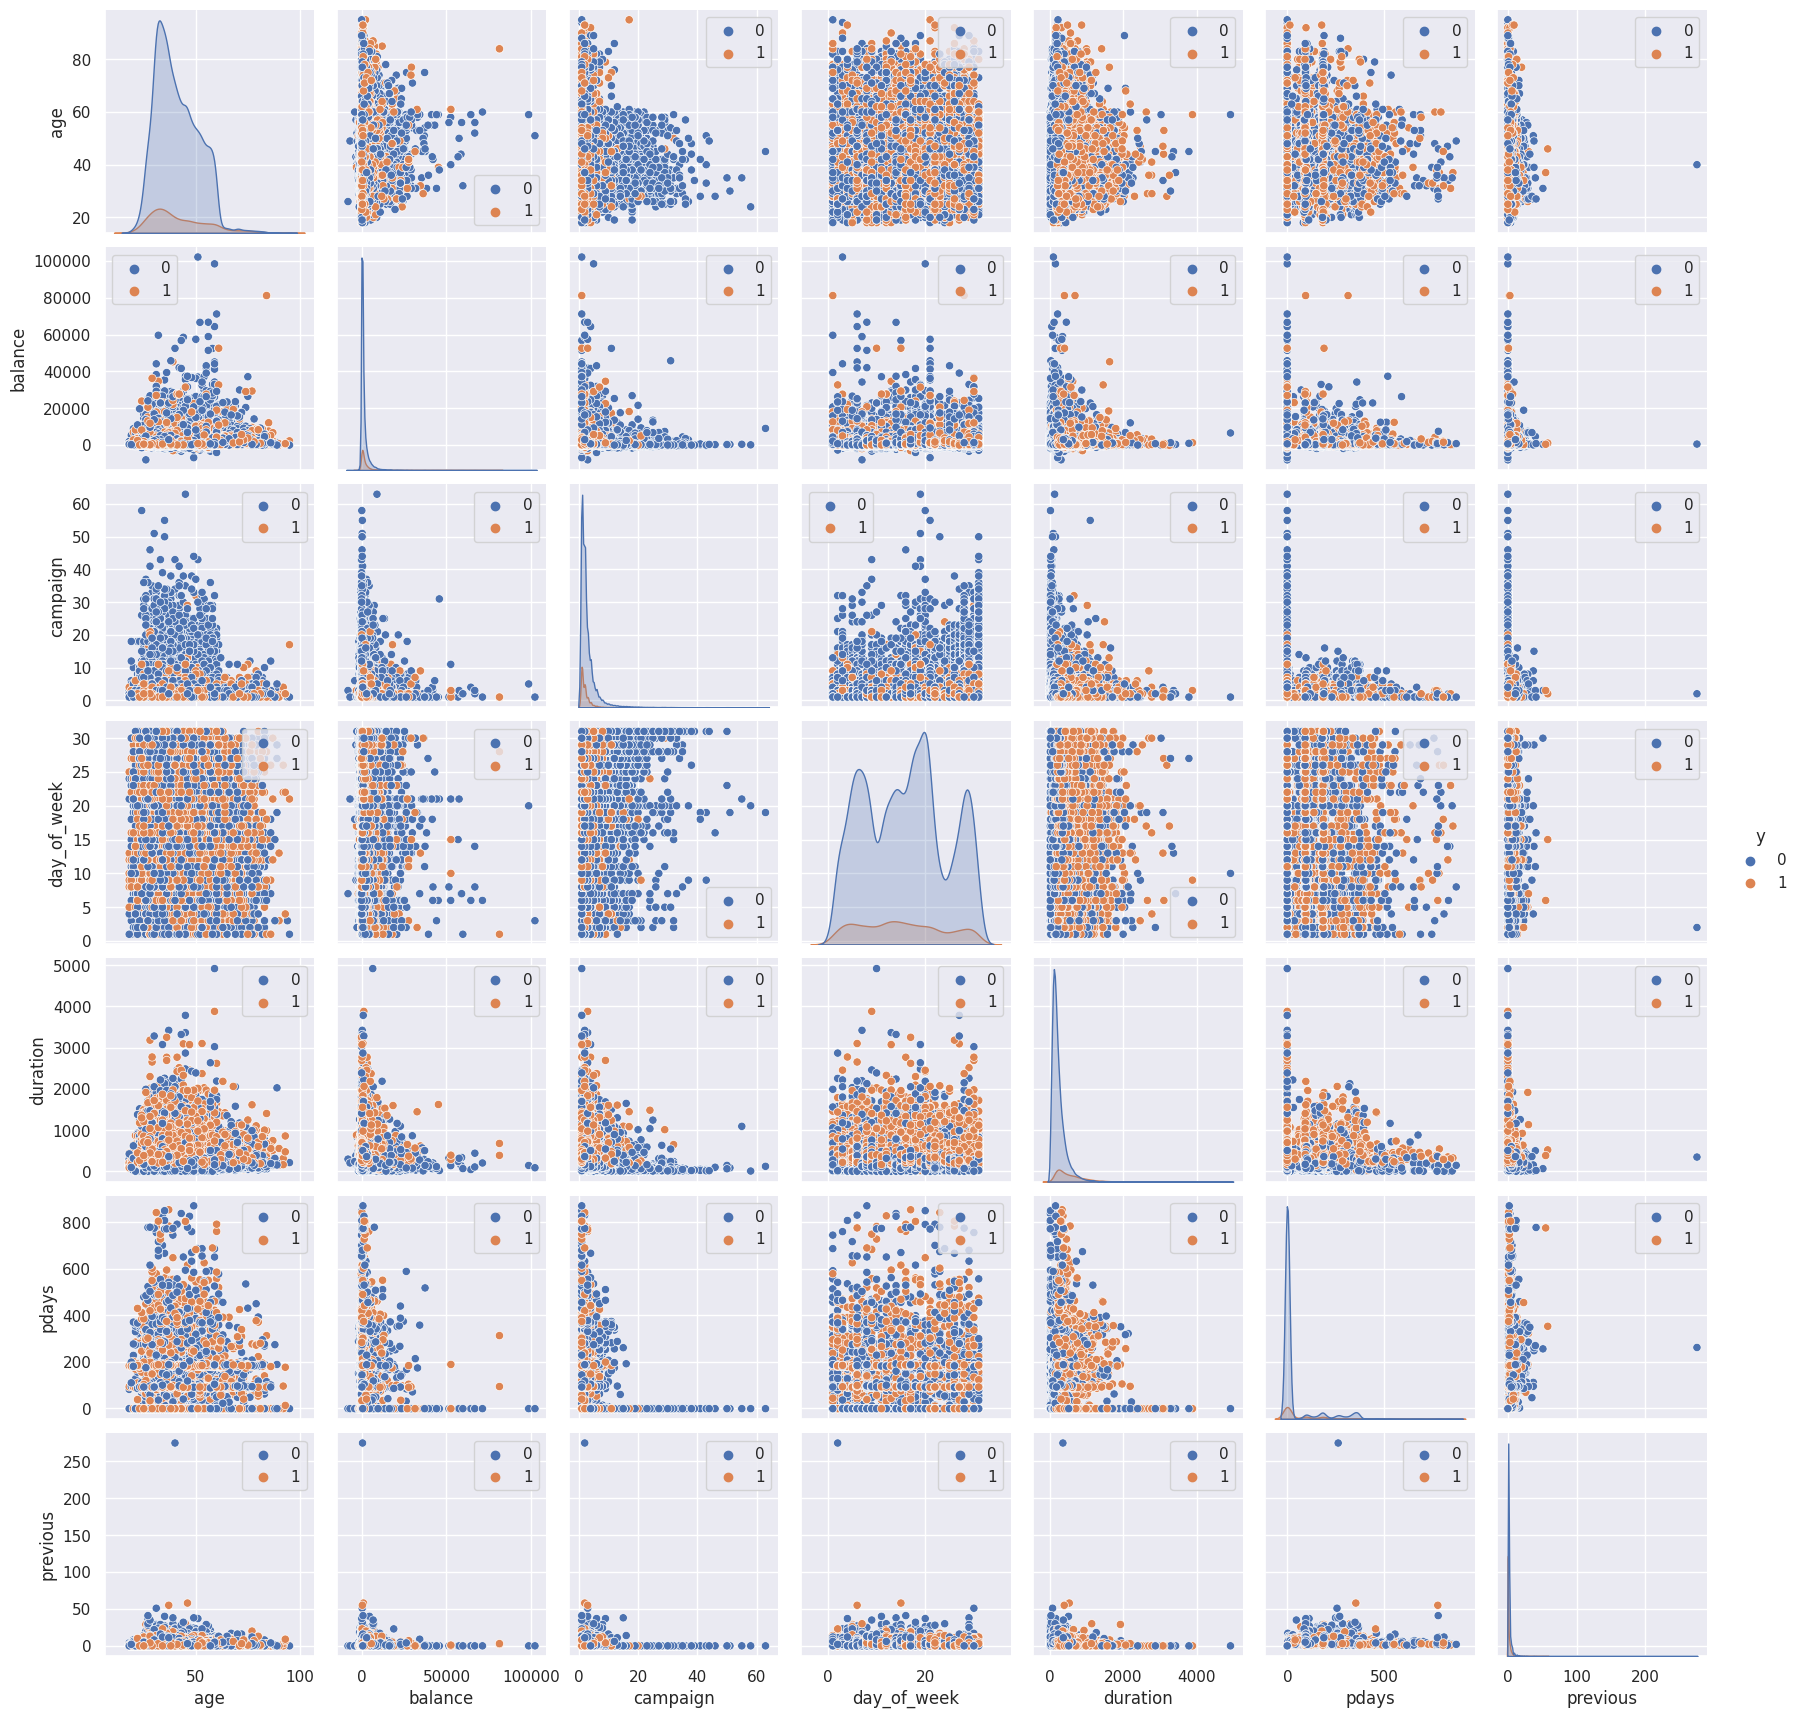

In [405]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.pairplot(df, hue='y', vars=new_cols)

for ax in g.axes.flat:
    if ax.get_legend():
        ax.get_legend().remove()

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

plt.show()

In [33]:
print("The data is randomly scattered with a really high entropy and degree of randomness and it is really difficult to figure out and classify it accordingly.")

The data is randomly scattered with a really high entropy and degree of randomness and it is really difficult to figure out and classify it accordingly.


## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [34]:
def binary_converter(x):
    if x == -1:
        return 0
    else:
        return 1
df['pdays_binary'] = df['pdays'].apply(lambda x: binary_converter(x))
print(len(df[df.pdays_binary == 0]),"people were not contacted")

36954 people were not contacted


------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [35]:
df.drop('y',axis=1, inplace = True)

In [36]:
print("There are ", len(df.columns),"columns now.")

There are  17 columns now.


-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame.

#### How many resulting columns in a DataFrame do you have after this operation?

In [37]:
# TODO add one-hot labels and drop columns
df = pd.get_dummies(df, columns=['job'])
df = pd.get_dummies(df, columns=['marital'])
df = pd.get_dummies(df, columns=['education'])
df = pd.get_dummies(df, columns=['contact'])
df = pd.get_dummies(df, columns=['poutcome'])

In [38]:
df.drop(['job_unknown','marital_single','education_unknown','contact_unknown','poutcome_unknown'],axis = 1, inplace = True)

In [39]:
print("There are ", len(df.columns), "columns in this DataFrame")

There are  33 columns in this DataFrame


In [40]:
mapper = {"yes": 1,
        "no": 0}
y['y'] = y['y'].map(mapper)

<ipython-input-40-b54b9ead3485>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].map(mapper)


In [41]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [42]:
from sklearn.model_selection import train_test_split
M = df.drop('month',axis=1)
M_train, M_test, y_train, y_test = train_test_split(M, y, random_state = 42, test_size=0.2, stratify=None)
print("There are ",(y_train == 1).sum()[0],"successful subscriptions in the train set")

There are  4198 successful subscriptions in the train set


## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[new_cols] = scaler.fit_transform(df[new_cols])
print("The median value in duration field after scaling is ", round(df.duration.median(),3))

The median value in duration field after scaling is  -0.304


## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(score_func=f_classif, k=3)
selector.fit(M, y.values)
feature_indices = selector.get_support(indices=True)
feature_scores = selector.scores_[feature_indices]
feature_dict = dict(zip(M.columns[feature_indices], feature_scores))
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)
top_3_features = sorted_features[:3]
list_top_3_features = [top_3_features[0][0],top_3_features[1][0],top_3_features[2][0]]
print("The top three features by anova classifier are: ",list_top_3_features)

The top three features by anova classifier are:  ['duration', 'poutcome_success', 'pdays_binary']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Parameter grid for C values
param_grid = {'C': np.logspace(-2, 4, 7)}

# LR model with L2 regularization
logreg = LogisticRegression(penalty='l2', max_iter=400)

# Search ==> cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(M_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=400),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])})

In [46]:
#Q16.1 What is an optimal C for l2 regularization?
optimal_C = grid_search.best_params_['C']
print(f"Optimal C for L2 regularization: {int(optimal_C)}")

Optimal C for L2 regularization: 10


In [47]:
#Q16.2 What is the accuracy for this params?
optimal_model = grid_search.best_estimator_
y_pred = optimal_model.predict(M_test)

accuracy_nova = accuracy_score(y_test, y_pred)
print(f"Accuracy for the optimal params: {accuracy_nova:.3f}")

Accuracy for the optimal params: 0.891


In [48]:
#Q16.3 What is the three most important features by logistic regression estimation?
top_features = np.argsort(np.abs(optimal_model.coef_))[0][::-1][:3]
feature_names = M_train.columns

sorted(feature_names[top_features], reverse=True)

['poutcome_success', 'job_blue-collar', 'housing']

In [49]:
#Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?
from sklearn.metrics import roc_auc_score, roc_curve
y_prob = optimal_model.predict_proba(M_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

print(f"Q16.4: ROC-AUC score: {roc_auc:.3f}")

Q16.4: ROC-AUC score: 0.868


------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
random_state = 42
# Define the parameter grid
param_grid = {
    'n_estimators': [10,20,50, 100, 200],
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

# Create the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(M_train, y_train)

# Get the best parameters found by the grid search
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [51]:
Q17.1 What is an optimal depth and number of trees?
print("Optimal number of trees:", best_n_estimators)
print("Optimal maximum depth:", best_max_depth)


Object `trees` not found.
Optimal number of trees: 200
Optimal maximum depth: 15


In [52]:
#Q17.2 What is the roc-auc for this params?
from sklearn.metrics import f1_score
y_prob = grid_search.best_estimator_.predict_proba(M_test)[:, 1]
optimal_model = grid_search.best_estimator_
y_pred = optimal_model.predict(M_test)

accuracy_nova = accuracy_score(y_test, y_pred)

        # ROC AUC score for the current param
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print("ROC-AUC value is: ", round(roc_auc,3))
f1 = f1_score(y_test, y_pred)
print("f1 score: ",round(f1,3))


ROC-AUC value is:  0.907
f1 score:  0.435


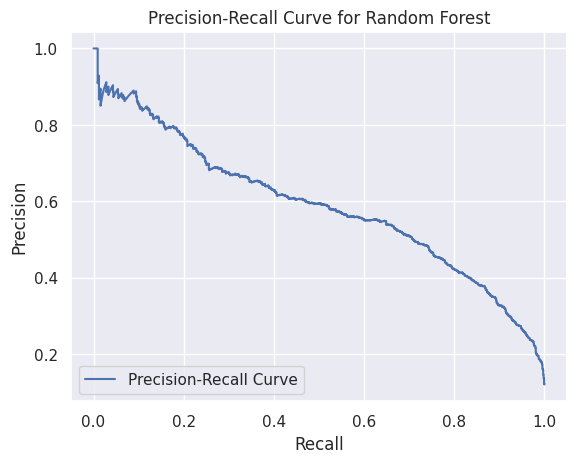

Highest precision for recall > 0.5: 0.595


In [53]:
#Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='lower left')
plt.show()
max_precision = 0
for p, r, t in zip(precision, recall, thresholds):
    if r > 0.5 and p > max_precision:
        max_precision = p

print("Highest precision for recall > 0.5:", round(max_precision,3))

In [54]:
#Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
from sklearn.metrics import recall_score
y_pred = np.where(y_prob >= 0.3, 1, 0)
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall,3))

Recall: 0.629


In [55]:
#Q17.7 What is the three most important features by random forest?
rf.fit(M_train, y_train)
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]
top_three_features = [M_train.columns[i] for i in sorted_indices[:3]]
print("Top three most important features:", top_three_features)

<ipython-input-55-2a5860e688f7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(M_train, y_train)


Top three most important features: ['duration', 'balance', 'age']


-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search.
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [56]:
#Select top-30 features (by random forest model). Train random forest again with the same parameters of grid search.
rf.fit(M_train, y_train)
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]
top_30_features = M_train.columns[sorted_indices[:30]]
print("Top 30 features:", top_30_features)

<ipython-input-56-919d0fb0f01f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(M_train, y_train)


Top 30 features: Index(['duration', 'balance', 'age', 'day_of_week', 'poutcome_success',
       'pdays', 'campaign', 'housing', 'previous', 'contact_cellular',
       'marital_married', 'education_secondary', 'job_technician',
       'education_tertiary', 'loan', 'poutcome_failure', 'job_management',
       'job_admin.', 'marital_divorced', 'job_blue-collar', 'pdays_binary',
       'education_primary', 'job_services', 'contact_telephone', 'job_retired',
       'job_unemployed', 'job_self-employed', 'job_student', 'poutcome_other',
       'job_entrepreneur'],
      dtype='object')


In [57]:
new_M_train = M_train [['duration', 'balance', 'age', 'day_of_week', 'poutcome_success',
       'pdays', 'campaign', 'housing', 'previous', 'contact_cellular',
       'marital_married', 'education_secondary', 'education_tertiary', 'loan',
       'job_technician', 'job_management', 'poutcome_failure',
       'marital_divorced', 'job_admin.', 'job_blue-collar', 'pdays_binary',
       'education_primary', 'job_services', 'poutcome_other',
       'contact_telephone', 'job_retired', 'job_self-employed',
       'job_unemployed', 'job_student', 'job_entrepreneur']]
new_M_test = M_test [['duration', 'balance', 'age', 'day_of_week', 'poutcome_success',
       'pdays', 'campaign', 'housing', 'previous', 'contact_cellular',
       'marital_married', 'education_secondary', 'education_tertiary', 'loan',
       'job_technician', 'job_management', 'poutcome_failure',
       'marital_divorced', 'job_admin.', 'job_blue-collar', 'pdays_binary',
       'education_primary', 'job_services', 'poutcome_other',
       'contact_telephone', 'job_retired', 'job_self-employed',
       'job_unemployed', 'job_student', 'job_entrepreneur']]

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
random_state = 42
# Define the parameter grid
param_grid = {
    'n_estimators': [10,20,50, 100, 200],
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

# Create the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(new_M_train, y_train)

# Get the best parameters found by the grid search
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [59]:
# 18.1 What is the roc-auc score for this model?
y_prob = grid_search.best_estimator_.predict_proba(new_M_test)[:, 1]
optimal_model = grid_search.best_estimator_
y_pred = optimal_model.predict(new_M_test)

accuracy_nova = accuracy_score(y_test, y_pred)

        # ROC AUC score for the current param
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print("ROC-AUC value is: ", round(roc_auc,3))

ROC-AUC value is:  0.908


In [63]:
#18.2 What is the f1 score for this model?
f1 = f1_score(y_test, y_pred)
print("f1: ",round(f1,3))

f1:  0.443


In [ ]:
#18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here
# Yes, the classification quality improves significantly after feature selection because the f1 score and the roc-auc score both increase after feature selection.

------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

In [ ]:
#For the anova, logistic regression and random forest methods, th top three features are partially consistent as 'Duraton' and 'poutcome_success' repeats in both logistic regression and random forest. There are no strange features as all the top features play a role in the prediction.

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features.
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

In [ ]:
#20.1 (3 points) Generate two (or more) meaningfull features.
#Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).
#Also, feel free to select features, etc. The pipeline is up to you.


In [65]:
df.head()

,age,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,...,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,1.606965,0,0.256419,1,0,-1.298476,may,0.011016,-0.569351,-0.411453,...,0,1,0,0,1,0,0,0,0,0
1,0.288529,0,-0.437895,1,0,-1.298476,may,-0.416127,-0.569351,-0.411453,...,0,0,0,1,0,0,0,0,0,0
2,-0.747384,0,-0.446762,1,1,-1.298476,may,-0.707361,-0.569351,-0.411453,...,0,1,0,1,0,0,0,0,0,0
3,0.571051,0,0.047205,1,0,-1.298476,may,-0.645231,-0.569351,-0.411453,...,0,1,0,0,0,0,0,0,0,0
4,-0.747384,0,-0.447091,0,0,-1.298476,may,-0.233620,-0.569351,-0.411453,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df["campaign_pdays"] = df["campaign"]/df["pdays"]
df["balance_duration"]=df["balance"]/df["duration"]

In [67]:
df

,age,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,...,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,campaign_pdays,balance_duration
0,1.606965,0,0.256419,1,0,-1.298476,may,0.011016,-0.569351,-0.411453,...,0,0,1,0,0,0,0,0,1.383756,23.276777
1,0.288529,0,-0.437895,1,0,-1.298476,may,-0.416127,-0.569351,-0.411453,...,0,1,0,0,0,0,0,0,1.383756,1.052310
2,-0.747384,0,-0.446762,1,1,-1.298476,may,-0.707361,-0.569351,-0.411453,...,0,1,0,0,0,0,0,0,1.383756,0.631591
3,0.571051,0,0.047205,1,0,-1.298476,may,-0.645231,-0.569351,-0.411453,...,0,0,0,0,0,0,0,0,1.383756,-0.073161
4,-0.747384,0,-0.447091,0,0,-1.298476,may,-0.233620,-0.569351,-0.411453,...,0,0,0,0,0,0,0,0,1.383756,1.913750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0,-0.176460,0,0,0.143418,nov,2.791329,0.076230,-0.411453,...,0,0,1,1,0,0,0,0,-0.185270,-0.063217
45207,2.831227,0,0.120447,0,0,0.143418,nov,0.768224,-0.246560,-0.411453,...,1,0,0,1,0,0,0,0,0.599243,0.156786
45208,2.925401,0,1.429593,0,0,0.143418,nov,3.373797,0.721811,1.436189,...,0,1,0,1,0,0,0,1,0.502588,0.423734
45209,1.512791,0,-0.228024,0,0,0.143418,nov,0.970146,0.399020,-0.411453,...,0,1,0,0,1,0,0,0,-0.969783,-0.235041


In [73]:
!pip install pandas xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
M = df.drop('month',axis=1)
M_train, M_test, y_train, y_test = train_test_split(M, y, test_size=0.2, random_state=42)


In [79]:
M.drop(['campaign_pdays','balance_duration'],axis = 1,inplace = True)

KeyError: ignored

In [80]:
#(3 points) Train a gradient boosting, that beats random forest using:
#20.2 XGBoost

xgb_model = xgb.XGBClassifier()

xgb_model.fit(M_train, y_train)

y_pred = xgb_model.predict(M_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.900807254229791
